In this assignment students will build the random forest model after
normalizing the variable to house pricing from boston data set.

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [1]:
# Importing the needed libraries

import pandas as pd
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Loading the data-set.

boston = load_boston()
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df["MEDV"] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
# Checking the data type.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
# Checking for missing values

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# Declaring x & y.

x = df.drop(columns="MEDV")
y = df["MEDV"]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

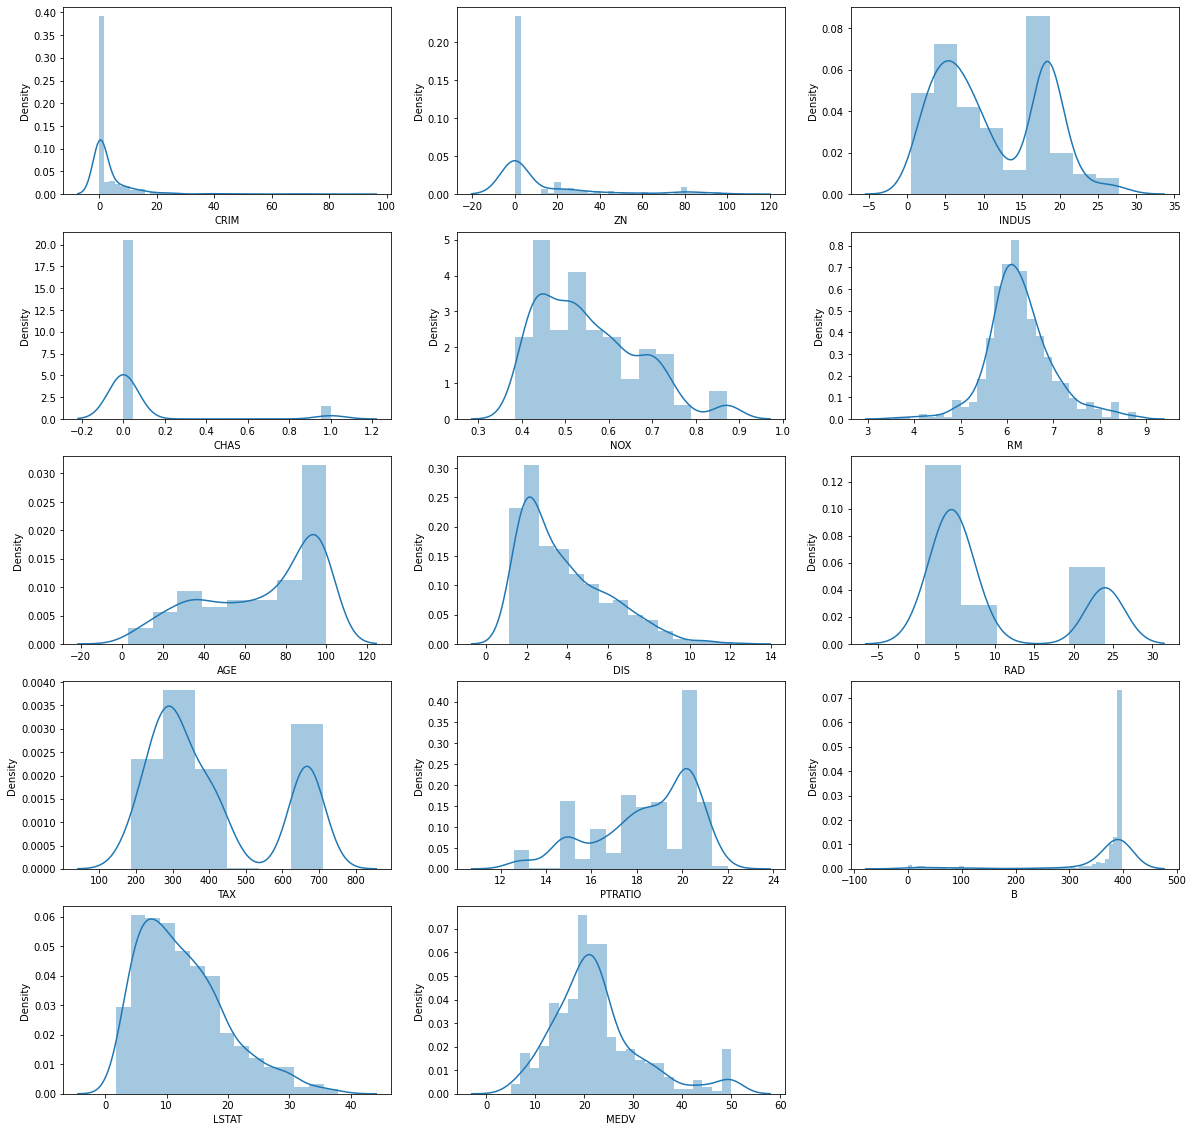

In [6]:
# Checking the distriibution of the data.

plot_number = 0
plt.figure(figsize=(20,20))
for i in df.columns:
    if plot_number<14:
        plot_number += 1
        plt.subplot(5,3,plot_number)
        sns.distplot(df[i])
plt.show()

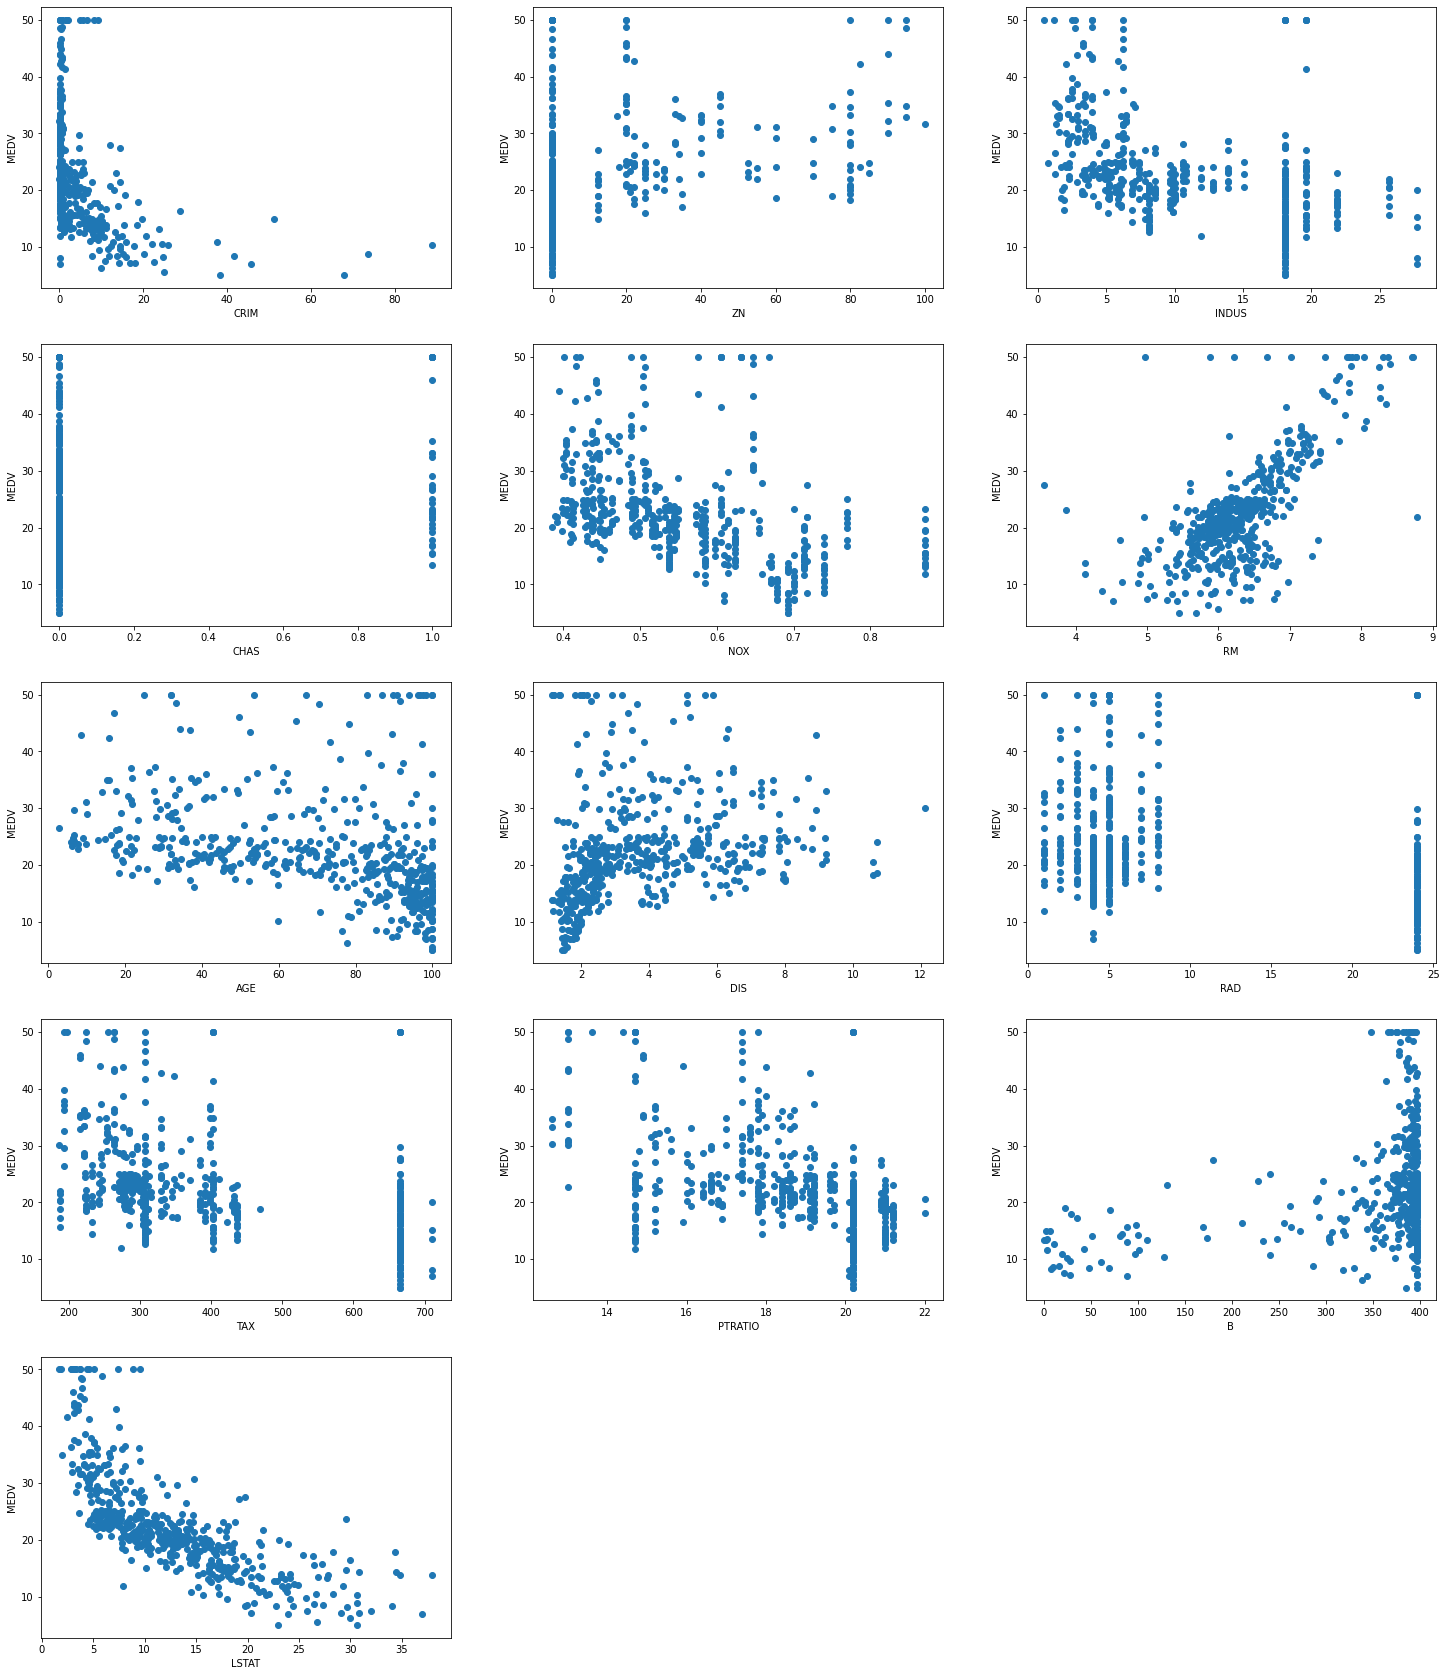

In [7]:
# Cecking relation between dependent and independent

plot_number = 0
plt.figure(figsize=(25,30))
for i in x.columns:
    if plot_number<13:
        plot_number += 1
        plt.subplot(5,3,plot_number)
        plt.scatter(x[i],y)
        plt.xlabel(i)
        plt.ylabel("MEDV")
plt.show()

In [8]:
# Checking for "Multi_Collinearity".

correlation = df.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [9]:
# Correlation between dependent and independent variables.

correlation.MEDV.sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [10]:
# Standardising the data 

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [11]:
# Variance_Inflation_Factor.

vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif

,Features,VIF
0,CRIM,1.792192
1,ZN,2.298758
2,INDUS,3.991596
3,CHAS,1.073995
4,NOX,4.393720
5,RM,1.933744
6,AGE,3.100826
7,DIS,3.955945
8,RAD,7.484496
9,TAX,9.008554


In [12]:
# Dropping "Tax"(because of 'multi-collinear' with "INDUS" & "RAD") and "CHAS"(since its contribution into target is very less).

x = df.drop(columns=["TAX","MEDV","CHAS",]) 
y = df["MEDV"]

In [13]:
# Standardising the data.

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [32]:
# Doing train test split and fitting the model onto training data-set.

forest = RandomForestRegressor() 
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=2)
forest.fit(x_train,y_train)

RandomForestRegressor()

In [33]:
# Printing the train and test scores.

print("   Train_score\t\tTest_score\n","-"*35)
print("  ",np.round(forest.score(x_train,y_train),4),"\t\t ",np.round(forest.score(x_test,y_test),4))

   Train_score		Test_score
 -----------------------------------
   0.9826 		  0.8976


Though the model is having good accuracy over training data-set the accuracy on test data-set is a little lower, which gives us a slightly over-fitting model. So we must make some parameter tuning.

### Doing Hyper-parameter tuning

In [34]:
# Doing RandomizedSearchCV for best ccp_alpha value from a certain range.

para = {'ccp_alpha':np.arange(0,1,.0001)}
random_search = RandomizedSearchCV(random_state=6,estimator=forest,param_distributions=para,cv=10,n_jobs=1)  # rand_state = 0,3
                                                                                                            #5,6

In [38]:
random_search.fit(x_train,y_train)
print(random_search.best_params_)

{'ccp_alpha': 0.2543}


In [39]:
# Making a tuned model.

forest = RandomForestRegressor(ccp_alpha=0.2543) 
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=2)
forest.fit(x_train,y_train)

RandomForestRegressor(ccp_alpha=0.2543)

In [40]:
print("   Train_score\t\tTest_score\n","-"*35)
print("  ",np.round(forest.score(x_train,y_train),4),"\t\t ",np.round(forest.score(x_test,y_test),4)) 

   Train_score		Test_score
 -----------------------------------
   0.9381 		  0.8882


### Now the over fitting is reduced than before,  and also has a very good train and test score.